In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 1.- Existe alguna relación entre 'Head Size(cm^3)' y 'Beain Weight(grams)'?

In [4]:
df = pd.read_csv('datasets/headbrain.csv')
df.head(2)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297


In [5]:
X = df['Head Size(cm^3)']
Y = df['Brain Weight(grams)']

np.corrcoef(X,Y)

array([[1.        , 0.79956971],
       [0.79956971, 1.        ]])

(array([ 900., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.]),
 <a list of 9 Text major ticklabel objects>)

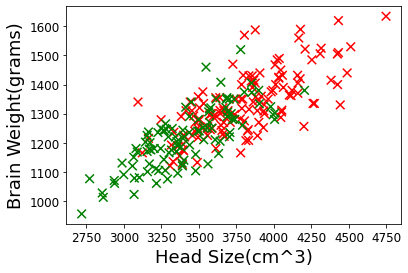

In [6]:
colors = {1 : 'red', 2 : 'green'}
plt.scatter(X,Y,
           c = df['Gender'].map(colors),
           marker = 'x',
           s = 75)

plt.xlabel('Head Size(cm^3)', fontweight = 'regular', color = 'black', fontsize = 18, horizontalalignment = 'center')
plt.ylabel('Brain Weight(grams)', fontweight = 'regular', color = 'black', fontsize = 18, horizontalalignment = 'center')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

Conclusion: El coeficiente es de 0.7995, por lo que podemos decir que existe una correlación muy fuerte entre ambas variables.

In [7]:
model = sm.OLS.from_formula('Y~X',
                           data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           5.96e-54
Time:                        13:48:04   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    325.5734     47.141      6.906      0.000     232.701     418.446
X              0.2634      0.013     20.409      0.000       0.238       0.289
==============================================================================
Omnibus:                        8.329   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.665
Skew:                           0.366   Prob(JB):                       0.0131
Kurtosis:                       3.584   Cond. No.                     3.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""